# Quickstart of SuPy

This quickstart demonstrates the essential and simplest workflow of `supy` in SUEWS simulation:

1. [load SUEWS input files](#Load-SUEWS-input-files)
2. [run SUEWS simulation](#Run-SUEWS-simulations)
3. [examine SUEWS results](#Examine-SUEWS-results)

More advanced use of `supy` are available in the [tutorials](tutorials/index)

Before start, we need to load the following necessary packages.

In [1]:
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path

## Load SUEWS input files

First, a path to SUEWS `RunControl.nml` should be specified, which will direct `supy` to locate input files.

In [2]:
path_runcontrol=Path('./sample_run')/'RunControl.nml'

### Model configuration

We call `sp.init_SUEWS_pd` to initialise a SUEWS simulation and get two `pandas` objects (note: the following names CAN be customised and are NOT fixed to the examples shown here):

1. `ser_mod_cfg`: a `Series` for model-wide specifications
2. `df_state_init`: a `DataFrame` for grid-specific settings

Once loaded in, these objects CAN be modified and reused for conducting simulations that differ from the one configured via input files under the above `dir_start`.

In [3]:
ser_mod_cfg, df_state_init = sp.init_SUEWS_pd(path_runcontrol)

A sample `ser_mod_cfg` looks like below:

In [4]:
ser_mod_cfg

multipleestmfiles                       0
resolutionfilesinestm                3600
disaggmethodestm                        1
fileinputpath                    ./Input/
fileoutputpath                  ./Output/
solweiguse                              0
disaggmethod                            1
ncol                                    1
ncmode                                  0
raindisaggmethod                      100
waterdepth                          20000
year                     [2012.0, 2013.0]
filecode                               Kc
writeoutoption                          2
resolutionfilesin                    3600
keeptstepfilesin                        0
resolutionfilesout                   3600
kdownzen                                0
multipleinitfiles                       0
multiplemetfiles                        0
keeptstepfilesout                       0
suppresswarnings                        1
cbluse                                  0
nrow                              

A sample `df_state_init` looks below (note that `.T` is used here to a nicer tableform view):

In [6]:
df_state_init.filter(like='method').T

grid,1
aerodynamicresistancemethod,2
emissionsmethod,2
evapmethod,2
netradiationmethod,3
roughlenheatmethod,2
roughlenmommethod,2
smdmethod,0
stabilitymethod,3
storageheatmethod,1
waterusemethod,0


### Meteorological forcing

Following the convention of SUEWS, `supy` loads meteorological forcing (met-forcing) files at the grid level.

<div class="alert alert-info">

**Note:** 
    
    If `multiplemetfiles = 0` (i.e., all grids use the same met-forcing file) is set in `ser_mod_cfg`, the `grid` argument takes NO effect and is ignored by `supy`.

</div>

In [7]:
grid = df_state_init.index[0]
df_forcing = sp.load_SUEWS_Forcing_df_grid(path_runcontrol, grid)

## Run SUEWS simulations

Once met-forcing (via `df_forcing`) and initial conditions (via `df_state_init`) are loaded in, we call `sp.run_suews_df` to conduct a SUEWS simulation, which will return two `pandas` `DataFrame`s: `df_output` and `df_state`.

In [8]:
df_output, df_state = sp.run_suews_df(df_forcing, df_state_init)

### `df_output`

`df_output` is an ensemble output collection of major SUEWS output groups, including:
    
    * SUEWS: the essential SUEWS output variables
    * DailyState: variables of daily state information
    * snow: snow output variables (effective when `snowuse = 1` set in `ser_mod_cfg`)
    * ESTM: ESTM output variables (not implemented yet)


In [9]:
df_output.columns.levels[0]

Index(['DailyState', 'ESTM', 'SUEWS', 'snow'], dtype='object', name='group')

### `df_state`

`df_state` is a `DataFrame` for holding:
    
   1. all model states if `save_state` is set to `True` when calling `sp.run_suews_df` and `supy` may run significantly slower for a large simulation;
   2. or, only the final state if `save_state` is set to `False` (the default setting) in which mode `supy` has a similar performance as the standalone compiled SUEWS executable.

Entries in `df_state` have the same data structure as `df_state_init` and can thus be used for other SUEWS simulations staring at the timestamp as in `df_state`.

In [10]:
df_state.T

,1
aerodynamicresistancemethod,2
ah_min,"[15.0, 15.0]"
ah_slope_cooling,"[2.7, 2.7]"
ah_slope_heating,"[2.7, 2.7]"
ahprof_24hr,"[[0.57, 0.65], [0.45, 0.49], [0.43, 0.46], [0...."
alb,"[0.12, 0.15, 0.1363636363636363, 0.15225634374..."
albdectr_id,[0.15225634374953004]
albevetr_id,[0.1363636363636363]
albgrass_id,[0.19960460359755622]
albmax_dectr,0.18


## Examine SUEWS results

Thanks to the functionality inherited from `pandas` and other packages under the [PyData](https://pydata.org) stack, compared with the standard SUEWS simulation workflow, `supy` enables more convenient examination of SUEWS results by statistics calculation, resampling, plotting (and many more).

### Ouptut structure

`df_output` is organised with `MultiIndex` `(grid,timestamp)` and `(group,varaible)` as `index` and `columns`, respectively.

In [11]:
df_output.head()

group                        SUEWS                                             \
var                          Kdown     Kup       Ldown         Lup      Tsurf   
grid datetime                                                                   
1    2012-01-01 00:30:00  0.153333  0.0184  344.310184  372.270369  11.775916   
     2012-01-01 00:35:00  0.153333  0.0184  344.310184  372.270369  11.775916   
     2012-01-01 00:40:00  0.140000  0.0168  344.343664  372.308487  11.783227   
     2012-01-01 00:45:00  0.126667  0.0152  344.377146  372.346609  11.790539   
     2012-01-01 00:50:00  0.113333  0.0136  344.410631  372.384734  11.797850   

group                                                                 ...  \
var                              QN   QF          QS          QH   QE ...   
grid datetime                                                         ...   
1    2012-01-01 00:30:00 -27.825251  0.0 -156.208405  128.383154  0.0 ...   
     2012-01-01 00:35:00 -27.825251  0.0 -156.208405  128.383154  0.0 ...   
     2012-01-01 00:40:00 -27.841623  0.0 -156.221765  128.380141  0.0 ...   
     2012-01-01 00:45:00 -27.857996  0.0 -156.235125  128.377129  0.0 ...   
     2012-01-01 00:50:00 -27.874370  0.0 -156.248486  128.374116  0.0 ...   

group                    DailyState                                   \
var                        DSnowPvd DSnowBldgs DSnowEveTr DSnowDecTr   
grid datetime                                                          
1    2012-01-01 00:30:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:35:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:40:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:45:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:50:00        NaN        NaN        NaN        NaN   

group                                                                  
var                      DSnowGrass DSnowBSoil DSnowWater  a1  a2  a3  
grid datetime                                                          
1    2012-01-01 00:30:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:35:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:40:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:45:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:50:00        NaN        NaN        NaN NaN NaN NaN  

[5 rows x 245 columns]

Here we demonstrate several typical scenarios for SUEWS results examination.

The essential `SUEWS` output collection is extracted as a separate variable for easier processing in the following sections. More [advanced slicing techniques](http://pandas.pydata.org/pandas-docs/stable/advanced.html#multiindex-advanced-indexing) are available in `pandas` documentation.

In [12]:
df_output_suews=df_output['SUEWS']

### Statistics Calculation

We can use `.describe()` method for a quick overview of the key surface energy balance budgets.

In [13]:
df_output_suews.loc[:,['QN','QS','QH','QE','QF']].describe()

var,QN,QS,QH,QE,QF
count,105397.000000,105397.000000,105397.000000,105397.000000,105397.0
mean,43.088982,-98.342391,131.026899,10.404474,0.0
std,136.465193,111.355598,34.453585,22.753825,0.0
min,-85.761254,-203.484183,-6.928077,0.000000,0.0
25%,-41.724491,-167.550184,122.439764,0.000000,0.0
50%,-25.247367,-154.104851,126.377547,0.000000,0.0
75%,78.333777,-69.582638,142.053720,6.579627,0.0
max,698.440633,436.424557,262.016077,190.951936,0.0


### Plotting

Plotting is very straightforward via the `.plot` method bounded with `pandas` objects.

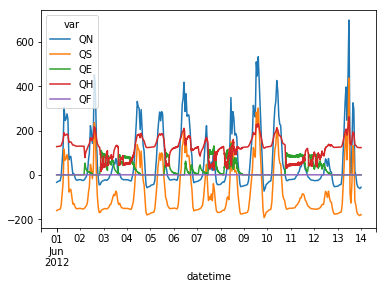

In [25]:
df_output_suews.loc[1].loc[
    '2012 6 1':'2012 6 13',
    ['QN','QS','QE','QH','QF']
].plot()

### Resampling

The suggested runtime/simulation frequency of SUEWS is `300 s`, which usually results a large output and may be over-weighted for storage. To slim down the output size, we can `resample` the default output. 

In [17]:
df_output_suews_rsmp=df_output_suews.loc[1].resample('1h').mean()

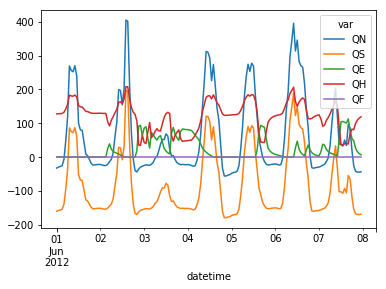

In [23]:
df_output_suews_rsmp.loc[
    '2012 6 1':'2012 6 7',
    ['QN','QS','QE','QH','QF']].plot()

The resampled output can be outputed for a smaller file.

In [20]:
df_output_suews_rsmp.to_csv('suews_1h.txt',
                            sep='\t',
                            float_format='%8.2f',
                            na_rep=-999)

For a justified format, we use the `to_string` for better format controlling and write the formatted string out to a file.

In [21]:
str_out=df_output_suews_rsmp.to_string(
    float_format='%8.2f',
    na_rep='-999',
    justify='right')
with open('suews_sample.txt','w') as file_out:
    print(str_out,file=file_out)